In [86]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config Inline.Backend.figure_format = "retina" 

In [2]:
gainS = pd.read_csv('./final_combined_results/type_gainS.tsv', sep = "\t")
gainM = pd.read_csv('./final_combined_results/type_gainM_update.tsv', sep = "\t")
lostS = pd.read_csv('./final_combined_results/type_lostS.tsv', sep = "\t")
lostM = pd.read_csv('./final_combined_results/type_lostM.tsv', sep = "\t")

In [3]:
gainS.head(20)

,Orthogroup,Cavernicola.proteins,Homalocoris_erythrogaster.proteins,Opisthacidius.proteins,Zeluroides_americanus.proteins,Zelurus_nigrolineatus.proteins,Cavernicola_functions,Cavernicola_annotation,Homalocoris_erythrogaster_functions,Homalocoris_erythrogaster_annotation,Opisthacidius_functions,Opisthacidius_annotation,Zeluroides_americanus_functions,Zeluroides_americanus_annotation,Zelurus_nigrolineatus_functions,Zelurus_nigrolineatus_annotation
0,OG0002109,FUN_005467-T1,"FUN_000669-T1, FUN_001442-T1, FUN_001485-T1, F...",NaN,NaN,NaN,"K:(K) Transcription,","hypothetical protein,","K:(K) Transcription, K:(K) Transcription, O:(O...","hypothetical protein, hypothetical protein, hy...",NaN,NaN,NaN,NaN,NaN,NaN
1,OG0002432,FUN_028886-T1,"FUN_004566-T1, FUN_004567-T1, FUN_008125-T1, F...",NaN,NaN,NaN,"I:(I) Lipid transport and metabolism,","hypothetical protein,","nan, O:(O) Posttranslational modification, pro...","hypothetical protein, putative ubiquitin carbo...",NaN,NaN,NaN,NaN,NaN,NaN
2,OG0003837,FUN_008847-T1,"FUN_004499-T1, FUN_015366-T1, FUN_022789-T1, F...",NaN,NaN,NaN,"nan,","hypothetical protein,","K:(K) Transcription, nan, nan, nan,","hypothetical protein, hypothetical protein, hy...",NaN,NaN,NaN,NaN,NaN,NaN
3,OG0004907,FUN_001863-T1,"FUN_001374-T1, FUN_001377-T1, FUN_003675-T1",NaN,NaN,NaN,"U:(U) Intracellular trafficking, secretion, an...","hypothetical protein,",E:(E) Amino acid transport and metabolism;T:(T...,"hypothetical protein, hypothetical protein, hy...",NaN,NaN,NaN,NaN,NaN,NaN
4,OG0006751,FUN_000851-T1,"FUN_001579-T1, FUN_006749-T1",NaN,NaN,NaN,"L:(L) Replication, recombination and repair,","hypothetical protein,","L:(L) Replication, recombination and repair, L...","hypothetical protein, hypothetical protein,",NaN,NaN,NaN,NaN,NaN,NaN
5,OG0006822,FUN_001737-T1,"FUN_001456-T1, FUN_008288-T1",NaN,NaN,NaN,"J:(J) Translation, ribosomal structure and bio...","Tryptophan--tRNA ligase, mitochondrial,","J:(J) Translation, ribosomal structure and bio...","hypothetical protein, hypothetical protein,",NaN,NaN,NaN,NaN,NaN,NaN
6,OG0006966,FUN_003996-T1,"FUN_001662-T1, FUN_015287-T1",NaN,NaN,NaN,"J:(J) Translation, ribosomal structure and bio...","hypothetical protein,","J:(J) Translation, ribosomal structure and bio...","hypothetical protein, hypothetical protein,",NaN,NaN,NaN,NaN,NaN,NaN
7,OG0007040,FUN_005468-T1,"FUN_001279-T1, FUN_008419-T1",NaN,NaN,NaN,"I:(I) Lipid transport and metabolism,","hypothetical protein,","C:(C) Energy production and conversion, I:(I) ...","hypothetical protein, hypothetical protein,",NaN,NaN,NaN,NaN,NaN,NaN
8,OG0007043,FUN_005485-T1,"FUN_000490-T1, FUN_001832-T1",NaN,NaN,NaN,"M:(M) Cell wall/membrane/envelope biogenesis,","hypothetical protein,","M:(M) Cell wall/membrane/envelope biogenesis, ...","hypothetical protein, hypothetical protein,",NaN,NaN,NaN,NaN,NaN,NaN
9,OG0007529,FUN_014217-T1,"FUN_001527-T1, FUN_015207-T1",NaN,NaN,NaN,"E:(E) Amino acid transport and metabolism,","hypothetical protein,","H:(H) Coenzyme transport and metabolism, E:(E)...","hypothetical protein, hypothetical protein,",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
gainS.columns

Index(['Orthogroup', 'Cavernicola.proteins',
       'Homalocoris_erythrogaster.proteins', 'Opisthacidius.proteins',
       'Zeluroides_americanus.proteins', 'Zelurus_nigrolineatus.proteins',
       'Cavernicola_functions', 'Cavernicola_annotation',
       'Homalocoris_erythrogaster_functions',
       'Homalocoris_erythrogaster_annotation', 'Opisthacidius_functions',
       'Opisthacidius_annotation', 'Zeluroides_americanus_functions',
       'Zeluroides_americanus_annotation', 'Zelurus_nigrolineatus_functions',
       'Zelurus_nigrolineatus_annotation'],
      dtype='object')

In [24]:
def prepare_table(df: pd.DataFrame, cols: list, split: bool = True) -> pd.DataFrame:
    df_prep = df.copy()[cols]
    split_cells = [x for x in cols if x != "Orthogroup"]
    if split:
        for col in split_cells:
            df_prep.loc[:, col] = df_prep[col].apply(lambda x: str(x).split(", "))
    return df_prep

In [6]:
gain_cols = ["Orthogroup", "Cavernicola_functions", "Cavernicola_annotation"]
df_gainS = prepare_table(gainS, gain_cols)
df_gainM = prepare_table(gainM, gain_cols)

In [7]:
df_gainS.head()

,Orthogroup,Cavernicola_functions,Cavernicola_annotation
0,OG0002109,"[K:(K) Transcription, ]","[hypothetical protein, ]"
1,OG0002432,"[I:(I) Lipid transport and metabolism, ]","[hypothetical protein, ]"
2,OG0003837,"[nan, ]","[hypothetical protein, ]"
3,OG0004907,"[U:(U) Intracellular trafficking, secretion, a...","[hypothetical protein, ]"
4,OG0006751,"[L:(L) Replication, recombination and repair, ]","[hypothetical protein, ]"


In [8]:
df_gainM.head()

,Orthogroup,Cavernicola_functions,Cavernicola_annotation
0,OG0000123,"[S:(S) Function unknown, nan, nan, nan, nan, n...","[hypothetical protein, hypothetical protein, h..."
1,OG0000165,"[nan, C:(C) Energy production and conversion, ...","[hypothetical protein, hypothetical protein, h..."
2,OG0000186,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[hypothetical protein, hypothetical protein, h..."
3,OG0000191,"[nan, nan, nan, nan, nan, nan, J:(J) Translati...","[hypothetical protein, hypothetical protein, h..."
4,OG0000301,"[Q:(Q) Secondary metabolites biosynthesis, tra...","[hypothetical protein, hypothetical protein, h..."


In [9]:
df_gainS = df_gainS.explode("Cavernicola_annotation")
df_gainM = df_gainM.explode("Cavernicola_annotation")

exclude = ("", "hypothetical protein")
unique_proteinsS = [x for x in df_gainS["Cavernicola_annotation"].unique().tolist() if x not in exclude]
unique_proteinsM = [x for x in df_gainM["Cavernicola_annotation"].unique().tolist() if x not in exclude]

In [10]:
unique_proteinsS

['Tryptophan--tRNA ligase',
 'mitochondrial',
 'Wwc1p',
 'Heparan sulfate 2-O-sulfotransferase 1',
 'C-type lectin (CTL) or carbohydrate-recognition domain (CRD)',
 'SWI/SNF-related matrix-associated actin-dependent regulator of chromatin sub A-like protein 1',
 'Nucleoplasmin/nucleophosmin domain',
 'ndufa5',
 'NADH-ubiquinone oxidoreductase subunit',
 'mediator complex subunit Med20',
 'ribosomal 40S subunit protein S24B',
 'retrograde transport',
 'endosome to Golgi',
 'Leucine rich repeat C-terminal domain',
 'Vacuolar protein sorting-associated protein 54',
 'E3 ubiquitin-protein ligase rbbp6',
 'Protein O-linked-mannose beta-1,2-N-acetylglucosaminyltransferase 1',
 'Spectrin beta chain',
 'non-erythrocytic 5',
 'Eukaryotic translation initiation factor 3 subunit E',
 'Cytochrome c oxidase assembly factor 6',
 'Exosome complex component RRP45',
 'peroxisomal assembly protein',
 'Glutathione S-transferase omega-1',
 'Syntaxin-6',
 'WD repeat-containing protein 13',
 "Guanosine-3',5

In [11]:
unique_proteinsM

['Carboxylesterase 5A',
 'Proteasome activator complex subunit 3',
 'heteroproteinous nuclear ribonucleoprotein',
 'Pfam:DUF2051',
 'Vasopressin receptor activity',
 'ATP-dependent zinc metalloprotease yme1l1',
 'AFG3-like protein 2',
 'Proteasome subunit alpha type-2',
 'SWI/SNF complex subunit smarcc1',
 'Cell division protein FtsI penicillin-binding protein 2',
 'NADH dehydrogenase subunit 4',
 'WD repeat-containing protein 78',
 'Acyl-CoA:lysophosphatidylglycerol acyltransferase 1',
 'glycosyl transferase',
 'GTP-binding protein Rho1',
 'Protein yippee-like 2',
 'Pleckstrin y domain-containing J member 1',
 'Serine/arginine repetitive matrix protein 2',
 'Carboxylesterase',
 'AMP deaminase',
 'Hexaprenyldihydroxybenzoate methyltransferase',
 'mitochondrial',
 'Actin-binding LIM protein 3',
 'Frizzled/Smoothened membrane region',
 'Acetylcholine receptor protein alpha 1-2-3-4 invertebrate',
 'Acetylcholine receptor subunit beta-like 2',
 'G-box binding factor',
 '26S proteasome non-

---

In [189]:
gain_cols = ["Orthogroup", "Cavernicola_functions"]
df_gainS = prepare_table(gainS, gain_cols, False)
df_gainM = prepare_table(gainM, gain_cols, False)

In [190]:
df_gainS

,Orthogroup,Cavernicola_functions
0,OG0002109,"K:(K) Transcription,"
1,OG0002432,"I:(I) Lipid transport and metabolism,"
2,OG0003837,"nan,"
3,OG0004907,"U:(U) Intracellular trafficking, secretion, an..."
4,OG0006751,"L:(L) Replication, recombination and repair,"
...,...,...
450,OG0013238,"S:(S) Function unknown,"
451,OG0013239,"nan,"
452,OG0013240,"O:(O) Posttranslational modification, protein ..."
453,OG0013241,"nan,"


In [191]:
df_gainM

,Orthogroup,Cavernicola_functions
0,OG0000123,"S:(S) Function unknown, nan, nan, nan, nan, na..."
1,OG0000165,"nan, C:(C) Energy production and conversion, G..."
2,OG0000186,"nan, nan, nan, nan, nan, nan, nan, nan, nan, n..."
3,OG0000191,"nan, nan, nan, nan, nan, nan, J:(J) Translatio..."
4,OG0000301,"Q:(Q) Secondary metabolites biosynthesis, tran..."
...,...,...
102,OG0010142,"nan, nan,"
103,OG0010361,"nan,"
104,OG0010362,"K:(K) Transcription, K:(K) Transcription,"
105,OG0010395,"T:(T) Signal transduction mechanisms,"


In [192]:
df_gainS.loc[:, "Cavernicola_functions"] = df_gainS["Cavernicola_functions"].apply(lambda x: re.findall("[A-Z]:\([A-Z]\)", x))
df_gainM.loc[:, "Cavernicola_functions"] = df_gainM["Cavernicola_functions"].apply(lambda x: re.findall("[A-Z]:\([A-Z]\)", x))
df_gainS["len"] = df_gainS["Cavernicola_functions"].apply(lambda x: len(x))
df_gainM["len"] = df_gainM["Cavernicola_functions"].apply(lambda x: len(x))

df_gainS = df_gainS[(df_gainS["len"]>0)]
df_gainM = df_gainM[df_gainM["len"]>0]

df_gainS = df_gainS.explode("Cavernicola_functions")
df_gainM = df_gainM.explode("Cavernicola_functions")

df_gainS = df_gainS[df_gainS["Cavernicola_functions"] != "S:(S)"]
df_gainM = df_gainM[df_gainM["Cavernicola_functions"] != "S:(S)"]

df_gainM = df_gainM.drop_duplicates()

df_gainS = df_gainS.drop(columns = ["len"])
df_gainM = df_gainM.drop(columns = ["len"])

df_gainS["Copy"], df_gainM["Copy"] = "S", "M"

df_gains_total = pd.concat([df_gainS, df_gainM])
# To add names using codes 
# mapping = {"G:(G)": somename, ...}
# df_gainS["name"]=df_gainS.map(mapping)

# df_gains_total.to_csv("df_gains_total.csv", index=False)

In [193]:
df_gains_total = df_gains_total.groupby(by=["Cavernicola_functions", "Copy"])["Orthogroup"].count().reset_index()
df_gains_total = df_gains_total.rename(columns={"Orthogroup": "Count"})
df_gains_total = df_gains_total.sort_values(by=["Cavernicola_functions"]).reset_index(drop=True)
# df_gains_total.to_csv("df_gains_total_grouped.csv", index=False)

In [194]:
df_gains_total

,Cavernicola_functions,Copy,Count
0,A:(A),M,4
1,A:(A),S,9
2,B:(B),M,1
3,B:(B),S,2
4,C:(C),M,3
5,C:(C),S,7
6,D:(D),M,1
7,D:(D),S,8
8,E:(E),S,11
9,E:(E),M,6


---

In [195]:
lostS.columns

Index(['Orthogroup', 'Cavernicola.proteins',
       'Homalocoris_erythrogaster.proteins', 'Opisthacidius.proteins',
       'Zeluroides_americanus.proteins', 'Zelurus_nigrolineatus.proteins',
       'Cavernicola_functions', 'Cavernicola_annotation',
       'Homalocoris_erythrogaster_functions',
       'Homalocoris_erythrogaster_annotation', 'Opisthacidius_functions',
       'Opisthacidius_annotation', 'Zeluroides_americanus_functions',
       'Zeluroides_americanus_annotation', 'Zelurus_nigrolineatus_functions',
       'Zelurus_nigrolineatus_annotation'],
      dtype='object')

In [196]:
lost_cols = ["Orthogroup", "Opisthacidius_annotation"]
df_lostS = prepare_table(lostS, lost_cols)
df_lostM = prepare_table(lostM, lost_cols)

df_lostS = df_lostS.explode("Opisthacidius_annotation")
df_lostM = df_lostM.explode("Opisthacidius_annotation")

exclude = ("", "nan", "hypothetical protein")
unique_proteins_lostS = [x for x in df_lostS["Opisthacidius_annotation"].unique().tolist() if x not in exclude]
unique_proteins_lostM = [x for x in df_lostM["Opisthacidius_annotation"].unique().tolist() if x not in exclude]

In [32]:
unique_proteins_lostS

['WD repeat-containing protein 7',
 '37S ribosomal protein S16',
 'mitochondrial',
 'putative E3 ubiquitin-protein ligase herc1',
 'Protein unc-80',
 'Protein MMS22-like',
 'Protein O-linked-mannose beta-1,4-N-acetylglucosaminyltransferase 2',
 'Copine-9',
 'ATP-binding cassette sub- D member 2',
 'Transient receptor putative cation channel sub A member 1',
 'LIM domain-binding protein 3',
 'regulation of otic vesicle morphoproteinsis',
 'Serine/threonine-protein kinase smg1',
 '3-hydroxy-3-methylglutaryl-coenzyme A reductase',
 'GTPase-activator protein for Rho-like GTPases',
 'ATPase Cu transporting protein 7B',
 'Neurabin-1',
 'holo-[acyl-carrier-protein] synthase',
 'Transcription factor 25',
 'RNA-binding protein 39',
 "High affinity cAMP-specific and IBMX-insensitive 3',5'-cyclic phosphodiesterase 8B",
 'Vacuolar protein sorting-associated protein 41',
 'E3 ubiquitin-protein ligase rad18',
 'Kelch-like protein 5',
 'poly(A)-specific ribonuclease',
 '1-phosphatidylinositol 4,5-bis

In [33]:
unique_proteins_lostM

['Carboxylesterase',
 'Myoblast determination protein 1 1',
 'Adenylate cyclase type 1',
 'Meckelin',
 'prolyl 4-hydroxylase',
 'Vasopressin receptor activity',
 "5'-3' exoribonuclease 1",
 'Protein of unknown function (DUF1676)',
 'WD repeat-containing protein 34',
 'DDB1- and CUL4-associated factor 6',
 'A disintegrin and metalloproteinase with thrombospondin motifs 6',
 'Tetratricopeptide repeat protein 39B',
 'Unc-32p',
 'Serine/threonine-protein kinase D1',
 'RPR',
 'Kinesin-like protein kif2a',
 'Nuclear transport factor 2',
 'Vestigial/Tondu',
 'Dynein heavy chain 3',
 'axonemal',
 'Unc-22p',
 'myosin light chain kinase activity',
 'Immunoglobulin like',
 'DUF895 domain membrane protein',
 'protein required for normal CLN1 and CLN2 G1 cyclin expression',
 'Homeodomain',
 'Calmodulin-binding transcription activator',
 'Initiation factor eIF2 gamma',
 'C terminal',
 'Or19ap',
 'Cytoplasmic dynein 1 heavy chain 1',
 'Protein apcdd1',
 'G2/mitotic-specific cyclin-B3',
 'Uridine-cyti

---

In [197]:
lost_cols = ["Orthogroup", "Opisthacidius_functions"]
df_lostS = prepare_table(lostS, lost_cols, False)
df_lostM = prepare_table(lostM, lost_cols, False)

In [198]:
df_lostS.loc[:, "Opisthacidius_functions"] = df_lostS["Opisthacidius_functions"].apply(lambda x: re.findall("[A-Z]:\([A-Z]\)", x))
df_lostM.loc[:, "Opisthacidius_functions"] = df_lostM["Opisthacidius_functions"].apply(lambda x: re.findall("[A-Z]:\([A-Z]\)", str(x)))
df_lostS["len"] = df_lostS["Opisthacidius_functions"].apply(lambda x: len(x))
df_lostM["len"] = df_lostM["Opisthacidius_functions"].apply(lambda x: len(x))

df_lostS = df_lostS[(df_lostS["len"]>0)]
df_lostM = df_lostM[df_lostM["len"]>0]

df_lostS = df_lostS.explode("Opisthacidius_functions")
df_lostM = df_lostM.explode("Opisthacidius_functions")

df_lostS = df_lostS[df_lostS["Opisthacidius_functions"] != "S:(S)"]
df_lostM = df_lostM[df_lostM["Opisthacidius_functions"] != "S:(S)"]

df_lostM = df_lostM.drop_duplicates()

df_lostS = df_lostS.drop(columns = ["len"])
df_lostM = df_lostM.drop(columns = ["len"])

df_lostS["Copy"], df_lostM["Copy"] = "S", "M"

df_lost_total = pd.concat([df_lostS, df_lostM])

# df_gains_total.to_csv("df_gains_total.csv", index=False)

In [199]:
df_lost_total = df_lost_total.groupby(by=["Opisthacidius_functions", "Copy"])["Orthogroup"].count().reset_index()
df_lost_total = df_lost_total.rename(columns={"Orthogroup": "Count"})
df_lost_total = df_lost_total.sort_values(by=["Opisthacidius_functions"]).reset_index(drop=True)
# df_lost_total.to_csv("df_lost_total_grouped.csv", index=False)

---

In [200]:
df_lost_total["Opisthacidius_functions"].unique()

array(['A:(A)', 'B:(B)', 'C:(C)', 'D:(D)', 'E:(E)', 'F:(F)', 'G:(G)',
       'H:(H)', 'I:(I)', 'J:(J)', 'K:(K)', 'L:(L)', 'M:(M)', 'N:(N)',
       'O:(O)', 'P:(P)', 'Q:(Q)', 'T:(T)', 'U:(U)', 'V:(V)', 'W:(W)',
       'Z:(Z)'], dtype=object)

In [206]:
df_gains_total = df_gains_total.sort_values(by=["Cavernicola_functions"])
df_lost_total = df_lost_total.sort_values(by=["Opisthacidius_functions"])

unique_functions  = df_gains_total["Cavernicola_functions"].unique().tolist()
df_gainS = df_gains_total[df_gains_total["Copy"]=="S"]
df_gainM = df_gains_total[df_gains_total["Copy"]=="M"]
df_lostS = df_lost_total[df_lost_total["Copy"]=="S"]
df_lostM = df_lost_total[df_lost_total["Copy"]=="M"]

gain_func = "Cavernicola_functions"
lost_func = "Opisthacidius_functions"
for func in unique_functions:
    if func not in df_gainS[gain_func].unique().tolist():
        df_gainS = pd.concat([df_gainS, pd.DataFrame([{gain_func: func, "Count": 0}])])
    if func not in df_gainM[gain_func].unique():
        df_gainM = pd.concat([df_gainM, pd.DataFrame([{gain_func: func, "Count": 0}])])
    if func not in df_lostS[lost_func].unique():
        df_lostS = pd.concat([df_lostS, pd.DataFrame([{lost_func: func, "Count": 0}])])
    if func not in df_lostM[lost_func].unique():
        df_lostM = pd.concat([df_lostM, pd.DataFrame([{lost_func: func, "Count": 0}])])

df_gainS = df_gainS.sort_values(by=[gain_func])
df_gainM = df_gainM.sort_values(by=[gain_func])
df_lostS = df_lostS.sort_values(by=[lost_func])
df_lostM = df_lostM.sort_values(by=[lost_func])

In [202]:
print(
set(df_lost_total["Opisthacidius_functions"].unique()) - set(df_gains_total["Cavernicola_functions"].unique()),
set(df_gains_total["Cavernicola_functions"].unique()) - set(df_lost_total["Opisthacidius_functions"].unique()) 
)

set() set()


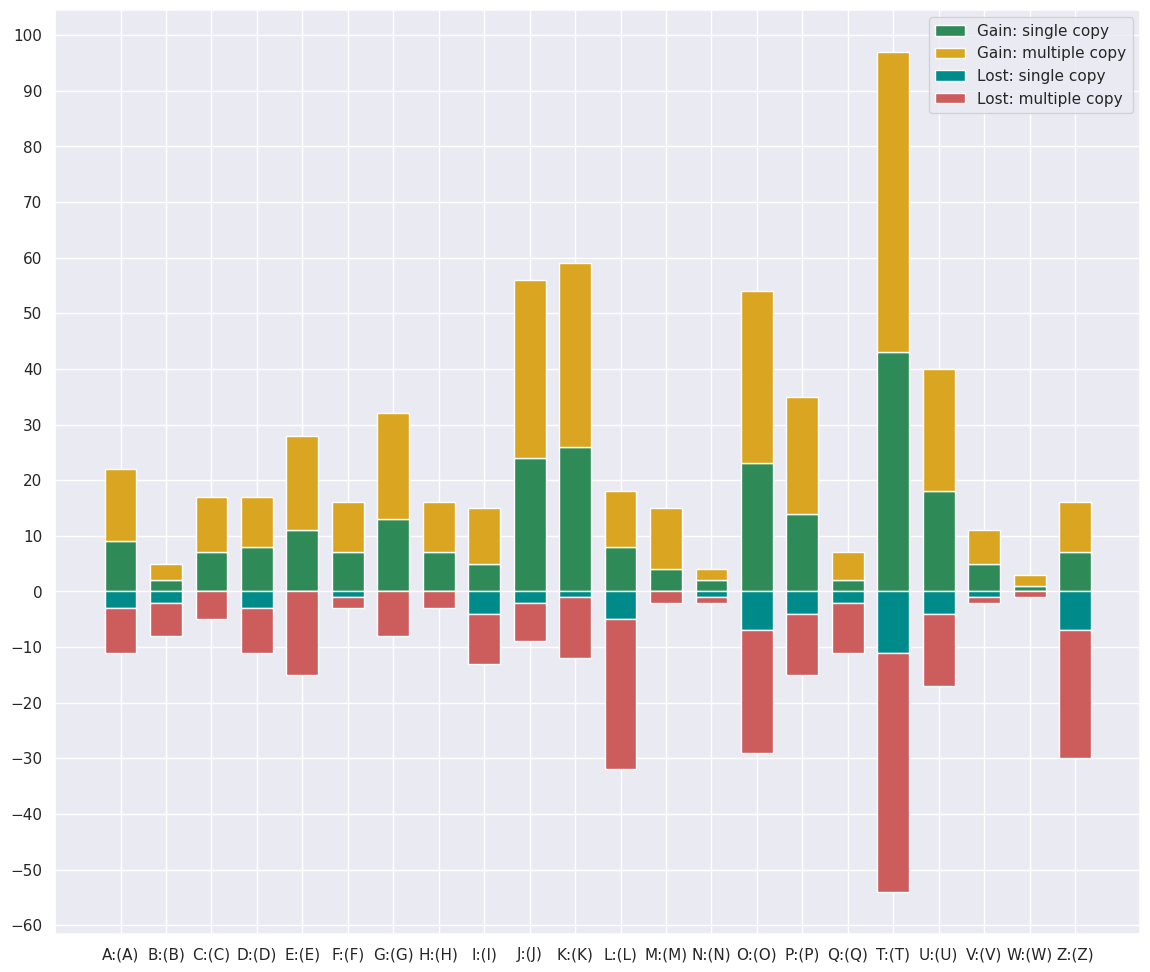

In [283]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot()

range_vals = range(df_gains_total["Cavernicola_functions"].nunique())

plt.bar(
    x=range_vals, 
    height=df_gainS["Count"].values, 
    width=0.7, 
    color="seagreen", 
    label = "Gain: single copy"
)
plt.bar(
    x=range_vals,
    height=df_gainS["Count"].values + df_gainM["Count"].values, 
    bottom=df_gainS["Count"].values,  
    width=0.7, 
    color="goldenrod", 
    label = "Gain: multiple copy"
)

plt.bar(
    x=range_vals, 
    height=-df_lostS["Count"].values, 
    width=0.7, 
    color="darkcyan", 
    label = "Lost: single copy"
)
plt.bar(
    x=range_vals,
    height=-df_lostS["Count"].values - df_lostM["Count"].values, 
    bottom=-df_lostS["Count"].values,  
    width=0.7, 
    color="indianred", 
    label = "Lost: multiple copy"
)

step = 1
positions = list(range(0, len(unique_functions), step))
ax.set_xticks(positions, [unique_functions[idx] for idx in positions])
plt.yticks(range(-60, 105, 10))
plt.legend()
plt.savefig('final_plot.png', dpi=100)
plt.show()